# COVID-19 Nord/Centro/Sud Italia - Raccolta e rappresentazione dati

Il seguente codice intende soltanto raccogliere e mostrare i dati raccolti dal Dipartimento di Protezione Civile. 

**Nessuna analisi viene effettuata.**

*fonte dati: https://github.com/pcm-dpc/COVID-19*


In [1]:
import pandas as pd
import pylab
import numpy as np

In [2]:
# importazione dati sisi
df_ncsi = pd.read_csv('./dati/dati-regioni/dpc-covid19-ita-regioni.csv', index_col="denominazione_regione", parse_dates=['data'])
        
print('Last data update: ',df_ncsi['data'].max())

Last data update:  2020-04-13 17:00:00


In [3]:
# classificazione regioni, tipologia di dato e taglio per "normalizzare" i giorni
nord = [
    'Piemonte', 'Valle d\'Aosta', 'Lombardia', 
    'P.A. Bolzano', 'P.A. Trento', 'Veneto', 
    'Friuli Venezia Giulia', 'Liguria', 'Emilia-Romagna'
]
centro = [
    'Toscana', 'Lazio', 'Umbria', 'Marche'
]
sud = ['Abruzzo', 'Molise', 'Basilicata', 'Campania', 
       'Puglia', 'Calabria', 'Sicilia', 'Sardegna'
]
 

dato = [
    'totale_casi',
    'totale_positivi',
    'variazione_totale_positivi',
    'nuovi_positivi',
    'deceduti',
    'dimessi_guariti',
    'terapia_intensiva',
    'ricoverati_con_sintomi',
    'isolamento_domiciliare',
#    'totale_ospedalizzati',
    'tamponi'    
]

taglio = [150, 150, 90, 10, 80, 20, 100, 100, 100, 4e3]

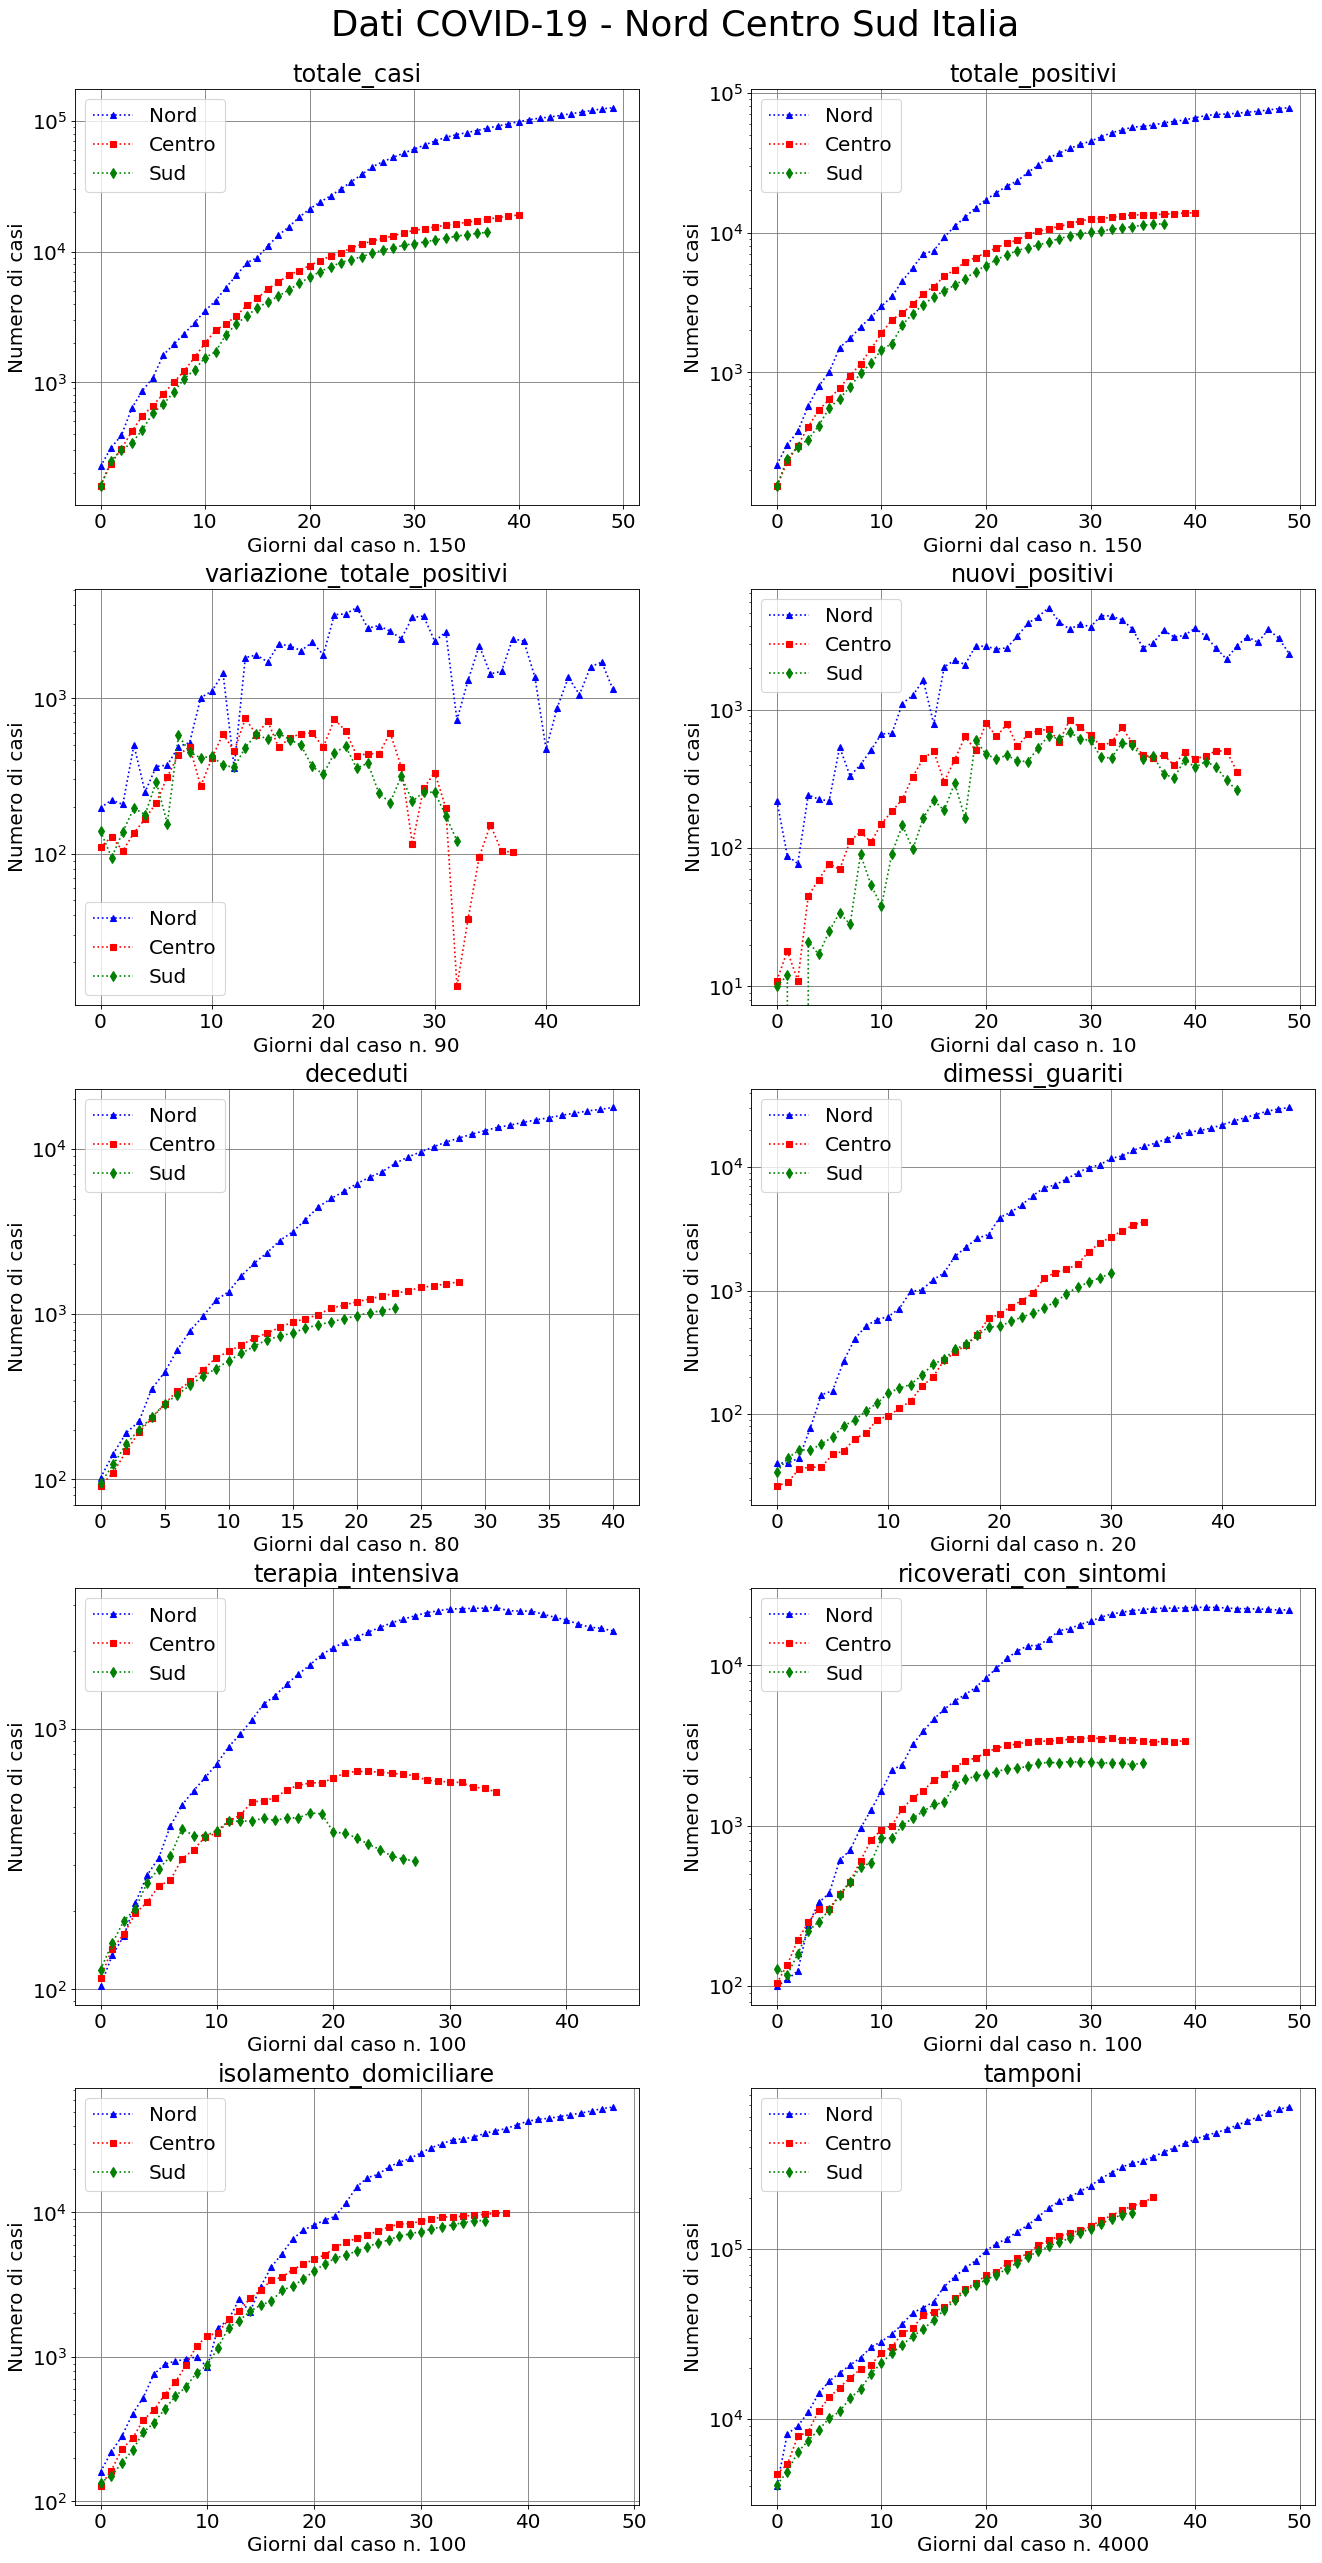

In [4]:
# costruzione figure
fig=pylab.figure(figsize=(20, 40), dpi= 80, facecolor='w', edgecolor='k')
fig.suptitle("Dati COVID-19 - Nord Centro Sud Italia" , fontsize=32, y=0.90, va='center')
a=1
while a<len(dato):
    for tipodato in dato:
        occo_nord=np.zeros(len(df_ncsi.loc['Piemonte']))
        for regione in nord:
            dati_reg = df_ncsi.loc[regione]
            occo_nord += dati_reg[tipodato].to_numpy()

        occo_centro=np.zeros(len(df_ncsi.loc['Piemonte']))
        for regione in centro:
            dati_reg = df_ncsi.loc[regione]
            occo_centro += dati_reg[tipodato].to_numpy()

        occo_sud=np.zeros(len(df_ncsi.loc['Piemonte']))
        for regione in sud:
            dati_reg = df_ncsi.loc[regione]
            occo_sud += dati_reg[tipodato].to_numpy()
            

        inn=0
        while inn < len(occo_nord) and occo_nord[inn] < taglio[a-1]:
                inn+=1
        tempon=np.arange(len(occo_nord[inn:]))    


        inc=0
        while inc < len(occo_centro) and occo_centro[inc] < taglio[a-1]:
                inc+=1
        tempoc=np.arange(len(occo_centro[inc:]))


        ins=0
        while ins < len(occo_sud) and occo_sud[ins]<taglio[a-1]:
                ins+=1
        tempos=np.arange(len(occo_sud[ins:]))

        pylab.rc('font', size=18)
        pylab.subplot(5, 2, a)
        pylab.title('%s' % dato[a-1])
        pylab.xlabel('Giorni dal caso n. %d' % taglio[a-1])
        pylab.ylabel('Numero di casi')
        pylab.yscale('log')
        pylab.grid(color='gray')

        pylab.plot(tempon, occo_nord[inn:], marker='^', linestyle=':', color='b', label='Nord')
        pylab.plot(tempoc, occo_centro[inc:], marker='s', linestyle=':', color='r', label='Centro')
        pylab.plot(tempos, occo_sud[ins:], marker='d', linestyle=':', color='g', label='Sud')
        
        pylab.legend()
        
        a=a+1
